In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import pylab

from sklearn import decomposition

from sklearn import preprocessing

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# dimensions des images

height = 72

width = 128


# Fonctions d'affichage des images

def display_image(video, image_position):

    try:

        img = video[video.position == image_position]

        url = img.index.values[0]

        img = img.values[0]

    except IndexError:

        raise Exception("La position demandée n'est pas disponible")

    img = img[1:] # On supprime la première colonne qui correspond à la position de l'image (en secondes)

    

    display_with_pylab(img, url)

    

def display_compressed_image(pca, std_scaler, X_projected, image_position, list_of_positions):

    try:

        i = np.where(list_of_positions == image_position)[0][0]

    except IndexError:

        raise Exception("La position demandée n'est pas disponible")

        

    compressed_img = X_projected[i]

    img = decompress_image(pca, std_scaler, compressed_img)

    url = list_of_positions.index[i]

    

    display_with_pylab(img, url)


def display_with_pylab(img, url=None):

    img = img.reshape(height, width, 3) # On remet l'image sous forme d'un numpy array de height*width*3

    img = img * 4 # On remet l'échelle des couleurs de 0 à 256

    img = np.array(img, dtype=np.float64)

    if url:

        print(url)

    fig = pylab.figure()

    pylab.imshow(img.astype(np.uint8))

    plt.show()   

    

def decompress_image(pca, std_scaler, compressed_img):

    img = pca.inverse_transform(compressed_img)

    img = std_scaler.inverse_transform(img)

    return img

https://youtu.be/uV5hmpzmWsU?t=150s


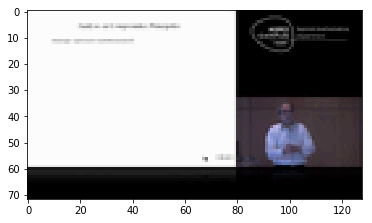

                                      position   0   1   2   3   4   5   6  \
https://youtu.be/uV5hmpzmWsU?t=0s            0   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=3s            3   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=6s            6   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=9s            9   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=12s          12   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=15s          15   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=18s          18   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=21s          21   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=24s          24   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=27s          27   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=30s          30  62  62  62  63  63  63  63   
https://youtu.be/uV5hmpzmWsU?t=33s          33  62  62  62  63  

In [13]:
# Chargement de la vidéo (peut prendre quelques secondes)

try:

    video

except NameError:

    video = pd.read_csv("video.csv/video", index_col= 0)

    

display_image(video,150)

print(video)


X = video.values[:,1:] # On supprime la première colonne qui correspond à la position de l'image (en secondes)

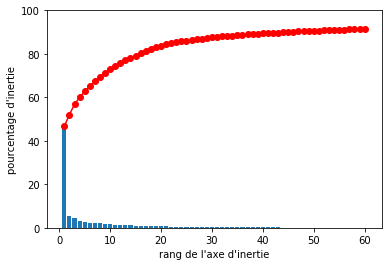

In [4]:
n_comp = 60


# centrage-réduction

X = X.astype(np.float64) # conversion des nombres entiers en nombres décimaux (float) : necessaire pour le StandardScaler

std_scaler = preprocessing.StandardScaler().fit(X)

X_scaled = std_scaler.transform(X)


# Calcul des composantes principales

pca = decomposition.PCA(n_components= n_comp) 

pca.fit(X_scaled) 

X_projected = pca.transform(X_scaled)


# Affichage des éboulis

eboulis = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(eboulis))+1, eboulis)

plt.plot(np.arange(len(eboulis))+1, eboulis.cumsum(),c="red",marker='o')

plt.ylim(0,100)

plt.xlabel("rang de l'axe d'inertie")

plt.ylabel("pourcentage d'inertie")

plt.show()

https://youtu.be/uV5hmpzmWsU?t=150s


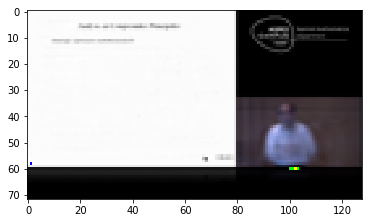

In [5]:
display_compressed_image(pca, std_scaler, X_projected, 150, video["position"])

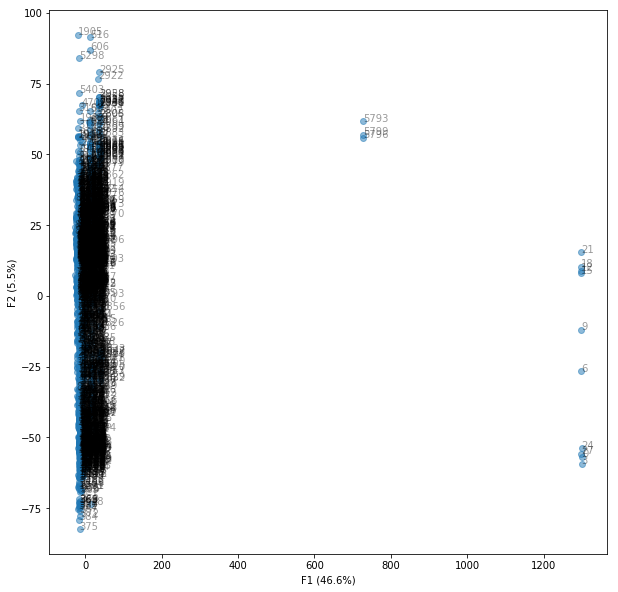

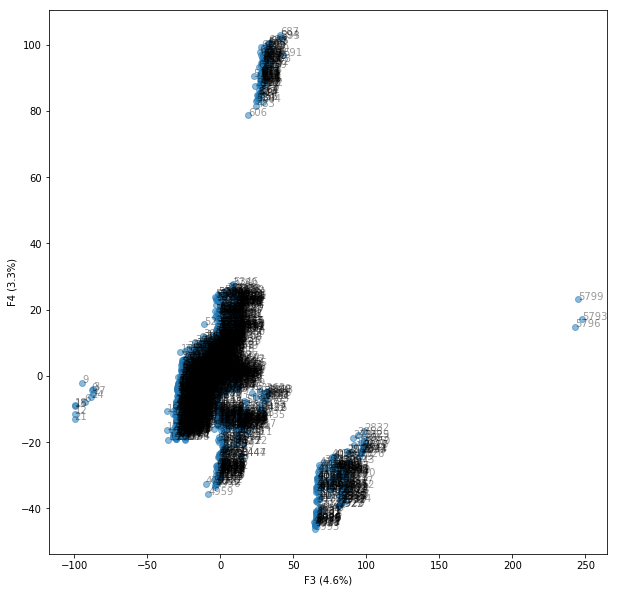

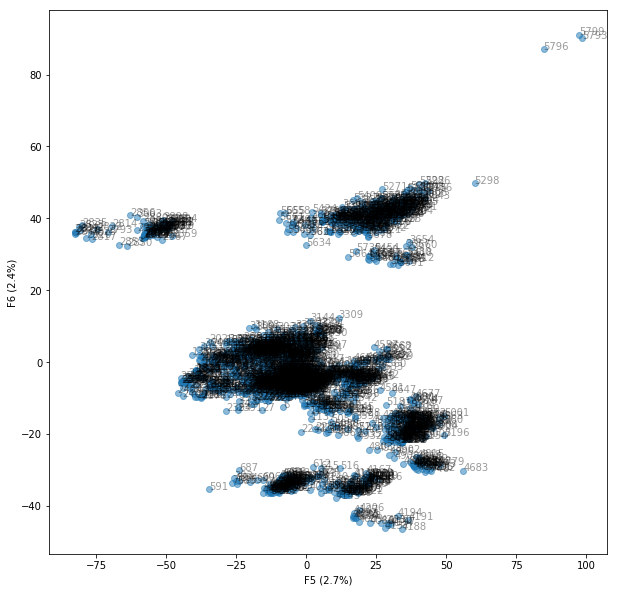

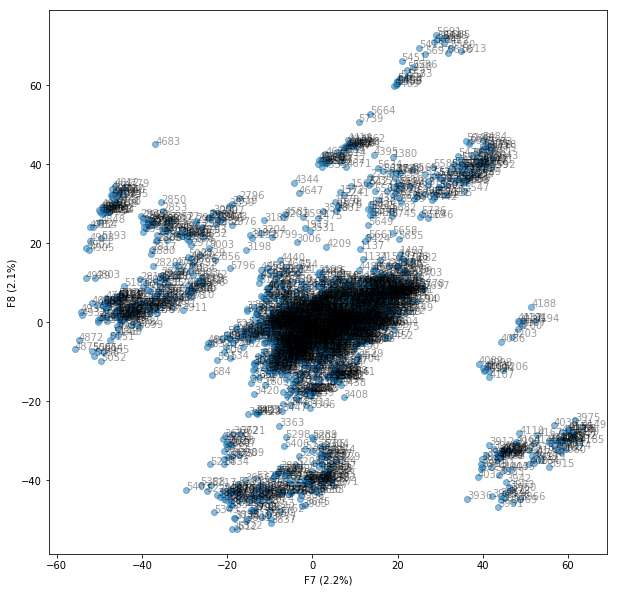

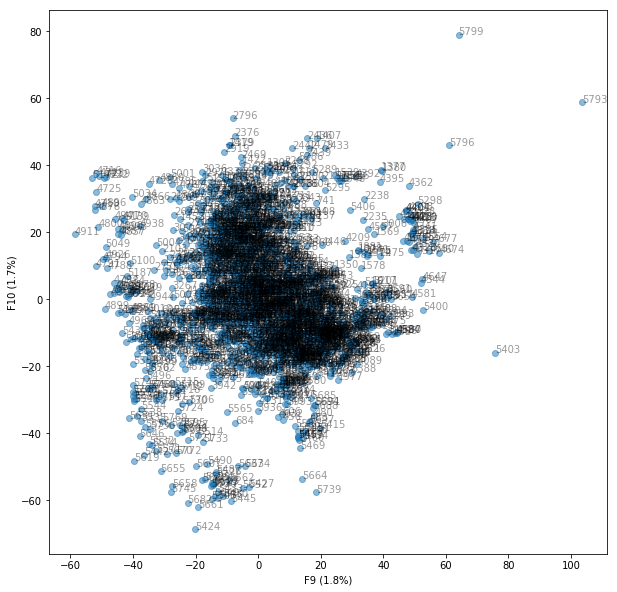

In [6]:
# Affichage des 5 premiers plans factoriels

for d1,d2 in [(0,1),(2,3),(4,5),(6,7),(8,9)]:

    if d2 < n_comp:

        fig = plt.figure(figsize=(10,10))

        plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha= 0.5)

        

        # On identifie les images par leur position dans la vidéo (en secondes)

        for i in range(len(X_projected)):

            plt.text(X_projected[i, d1], X_projected[i, d2], video["position"][i], alpha= 0.4)


        # nom des axes

        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))

        plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

        

        plt.show()

In [14]:
km = KMeans(n_clusters= 300)

#On utilise ici X_projected puisque l'on fait le clustering après l'ACP : 
km.fit(X_projected)

clusters_kmeans = km.labels_

centroids_after_kmeans = km.cluster_centers_

print(centroids_after_kmeans.shape) # 300 centres de n_comp dimensions

(300, 60)


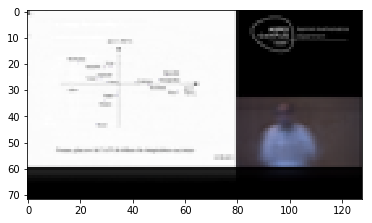

In [15]:
img = decompress_image(pca, std_scaler, centroids_after_kmeans[3]) # On choisit au hasard le cluster numéro 4

display_with_pylab(img)

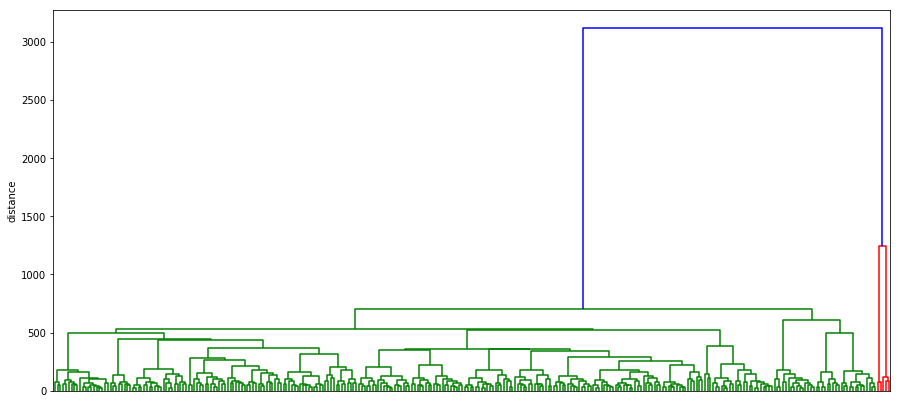

[23 39 17 19 34  4 24 40 36 38  2 35 32 11 13 16 25 11 21 26  8  3 23 38
  5 18  1 30  6 24 25 22 15 20 13 37  7 11  4  9 16 32 12 19 34 11 15 11
 30 31  2 10 23 18  2 22 18 35 29  5  7 26  3 25  1 26 18 16 19  9 23 32
 32  8  7 24 25  4 22 38 20 11  2 10 24 16  4 17 37 33  2  7 29  3 19 14
 19 39  2 15 17 36 30 20 25 11 18  7  8 16 34 18  7 34 10  2 21 25  4 25
  2 22  8 34 18 24 25 12 11  2 14 25 18 12 17  8  7  5 21 13 23 38 32 32
 25 18 15 23 29 26  2 26 23 19 38 15  9 21 19 30 19 28 19 35 27  2 30 38
 11 40 10  1  3  3 36 25 34 38 10  5 24 11  4 12 16 32 34 20 25 23 38  3
  7 26 26 25  5  2 25 30 19 14 20  5 24 22 28 19 38 33 27 23 11 22 38  5
  4 16  7 32 22 25 10 31 21 11  4  3 15 25 37 16 21  5  2 11 34 17  2  4
 18 13  2  8 16 36 20 35 31 16 24  4 23 34 26 34 18  7 23 16 33 23 36  2
 17  4 20 32 11 21 34 30 25 10 26  2  3  8 10 15 34 30  5 17 16 27  6  7
 11 10 32 23  9 32 17 40 23 28 14  7]


In [16]:
Z = linkage(centroids_after_kmeans, 'ward')


plt.figure(figsize=(15, 7))

plt.ylabel('distance')

dendrogram(Z, no_labels=True)

plt.show()


final_clusters = fcluster(Z, 40, criterion='maxclust')

print(final_clusters)

------------------------------ 
Slide n°  1
Première image :
https://youtu.be/uV5hmpzmWsU?t=5412s


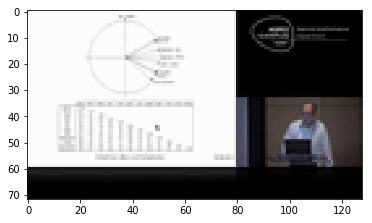

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :23)


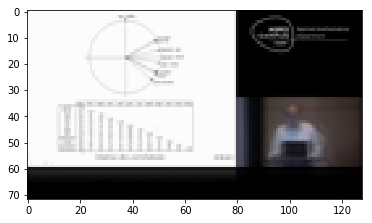

------------------------------ 
Slide n°  2
Première image :
https://youtu.be/uV5hmpzmWsU?t=5421s


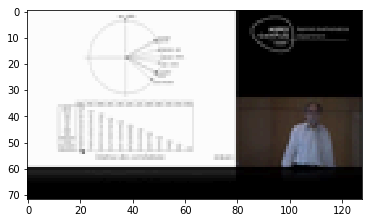

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :103)


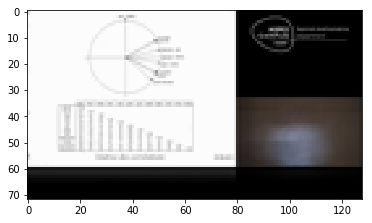

------------------------------ 
Slide n°  3
Première image :
https://youtu.be/uV5hmpzmWsU?t=3363s


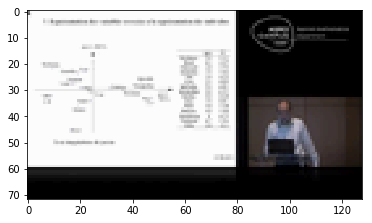

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :29)


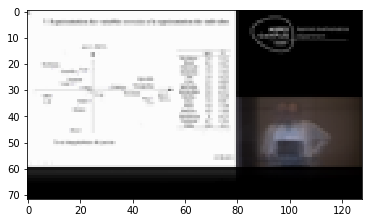

------------------------------ 
Slide n°  4
Première image :
https://youtu.be/uV5hmpzmWsU?t=4686s


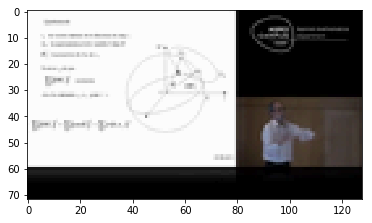

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :111)


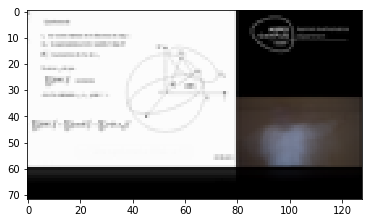

------------------------------ 
Slide n°  5
Première image :
https://youtu.be/uV5hmpzmWsU?t=4683s


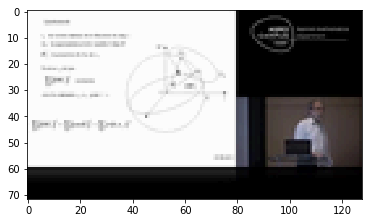

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :59)


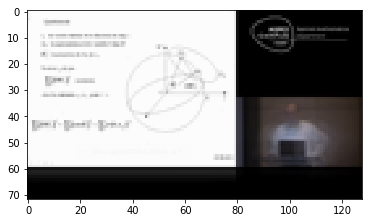

------------------------------ 
Slide n°  6
Première image :
https://youtu.be/uV5hmpzmWsU?t=30s


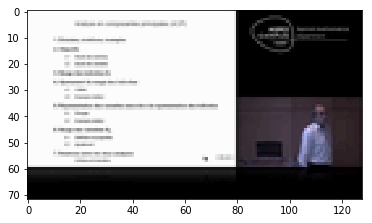

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :7)


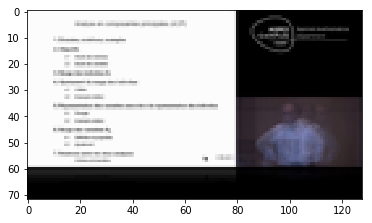

------------------------------ 
Slide n°  7
Première image :
https://youtu.be/uV5hmpzmWsU?t=3450s


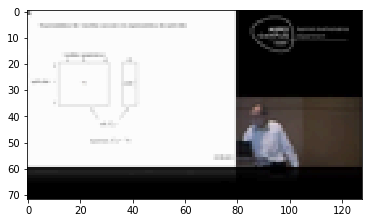

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :52)


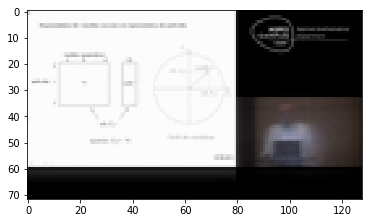

------------------------------ 
Slide n°  8
Première image :
https://youtu.be/uV5hmpzmWsU?t=1701s


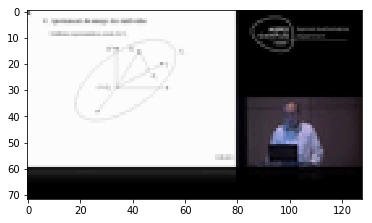

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :44)


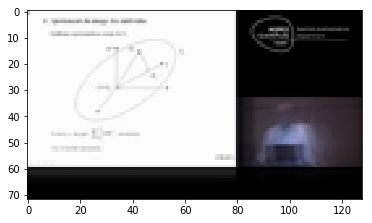

------------------------------ 
Slide n°  9
Première image :
https://youtu.be/uV5hmpzmWsU?t=1518s


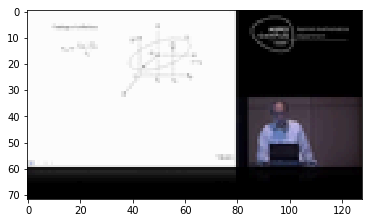

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :25)


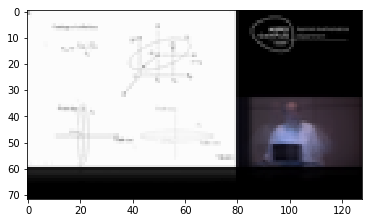

------------------------------ 
Slide n°  10
Première image :
https://youtu.be/uV5hmpzmWsU?t=312s


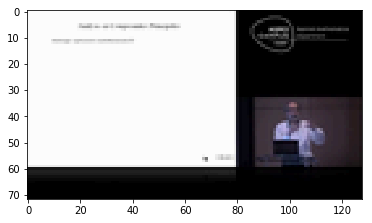

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :37)


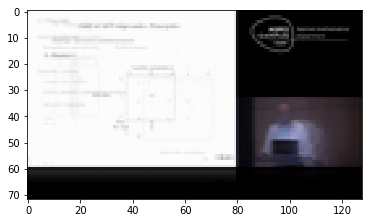

------------------------------ 
Slide n°  11
Première image :
https://youtu.be/uV5hmpzmWsU?t=4212s


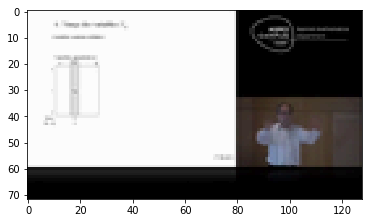

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :117)


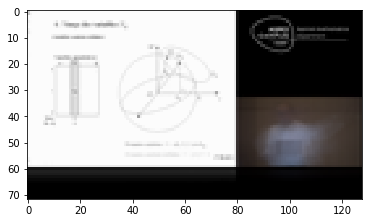

------------------------------ 
Slide n°  12
Première image :
https://youtu.be/uV5hmpzmWsU?t=1134s


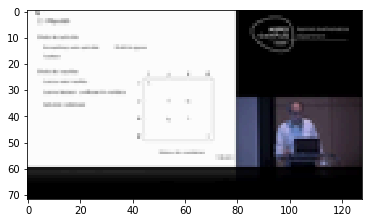

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :12)


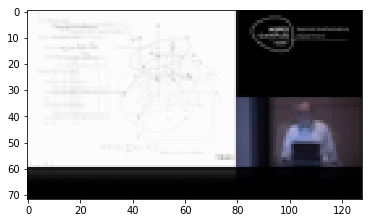

------------------------------ 
Slide n°  13
Première image :
https://youtu.be/uV5hmpzmWsU?t=4314s


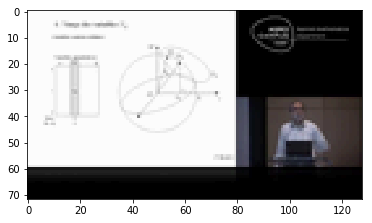

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :31)


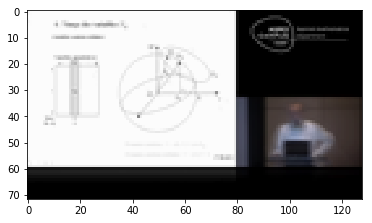

------------------------------ 
Slide n°  14
Première image :
https://youtu.be/uV5hmpzmWsU?t=1569s


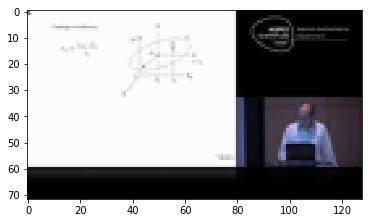

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :13)


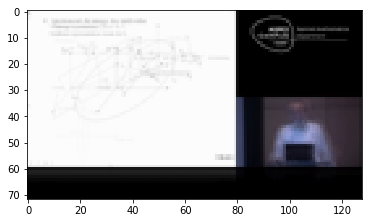

------------------------------ 
Slide n°  15
Première image :
https://youtu.be/uV5hmpzmWsU?t=1176s


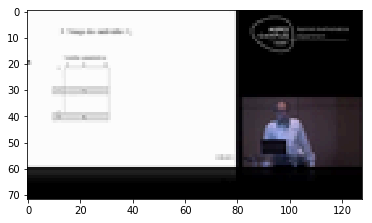

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :40)


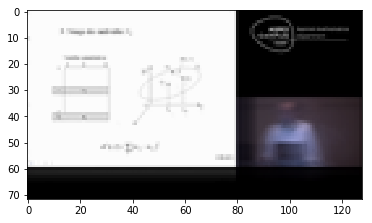

------------------------------ 
Slide n°  16
Première image :
https://youtu.be/uV5hmpzmWsU?t=1179s


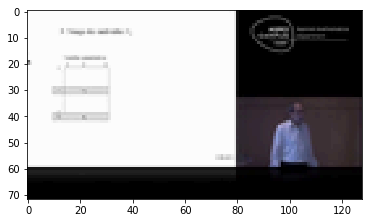

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :70)


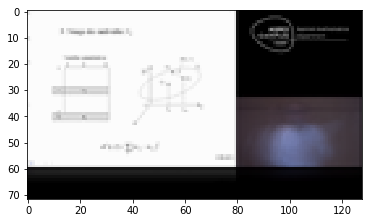

------------------------------ 
Slide n°  17
Première image :
https://youtu.be/uV5hmpzmWsU?t=2136s


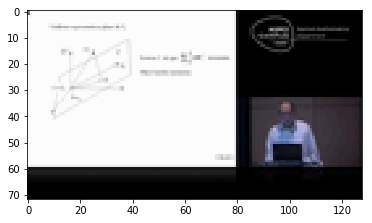

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :33)


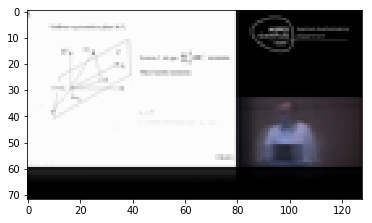

------------------------------ 
Slide n°  18
Première image :
https://youtu.be/uV5hmpzmWsU?t=2139s


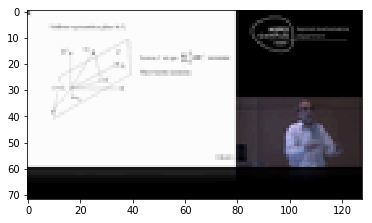

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :77)


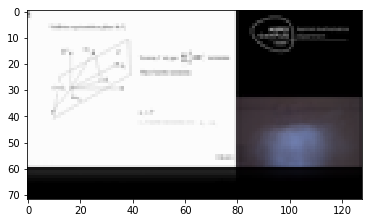

------------------------------ 
Slide n°  19
Première image :
https://youtu.be/uV5hmpzmWsU?t=3009s


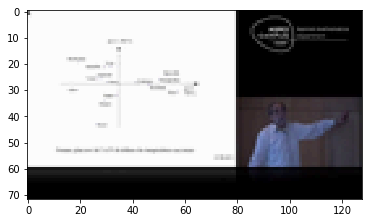

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :93)


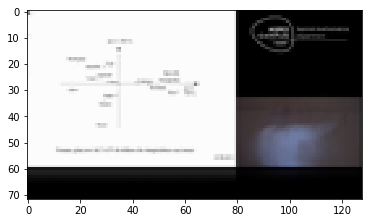

------------------------------ 
Slide n°  20
Première image :
https://youtu.be/uV5hmpzmWsU?t=3006s


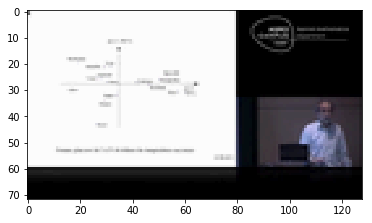

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :26)


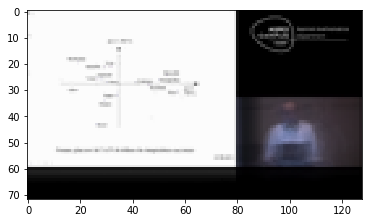

------------------------------ 
Slide n°  21
Première image :
https://youtu.be/uV5hmpzmWsU?t=2679s


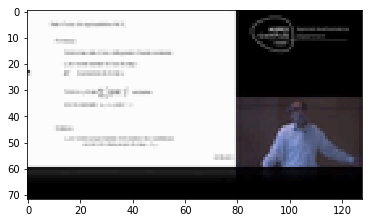

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :38)


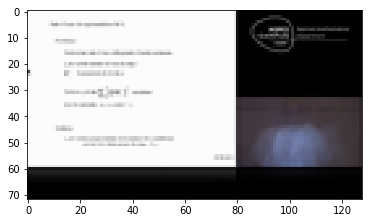

------------------------------ 
Slide n°  22
Première image :
https://youtu.be/uV5hmpzmWsU?t=2478s


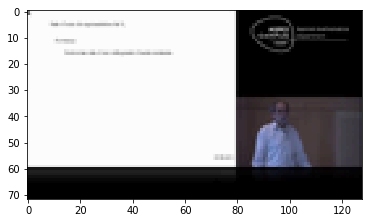

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :51)


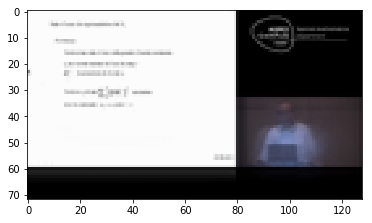

------------------------------ 
Slide n°  23
Première image :
https://youtu.be/uV5hmpzmWsU?t=1707s


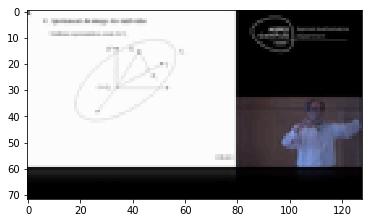

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :95)


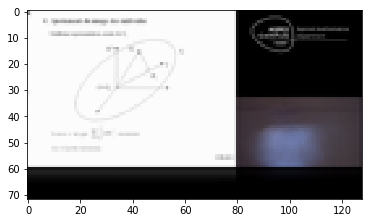

------------------------------ 
Slide n°  24
Première image :
https://youtu.be/uV5hmpzmWsU?t=51s


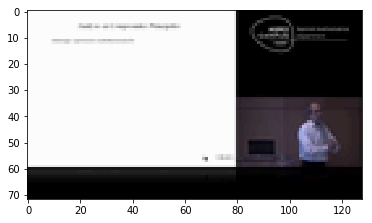

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :94)


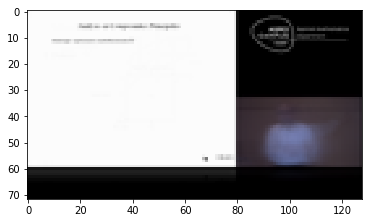

------------------------------ 
Slide n°  25
Première image :
https://youtu.be/uV5hmpzmWsU?t=708s


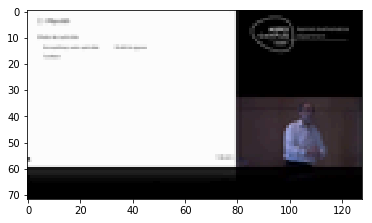

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :104)


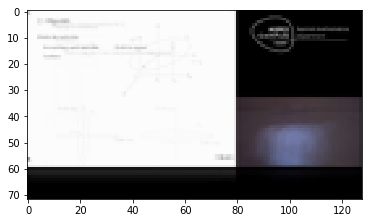

------------------------------ 
Slide n°  26
Première image :
https://youtu.be/uV5hmpzmWsU?t=897s


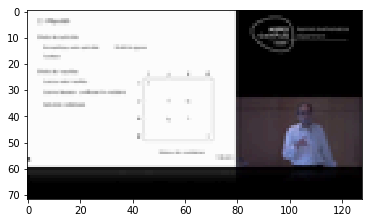

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :82)


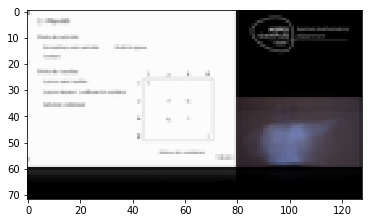

------------------------------ 
Slide n°  27
Première image :
https://youtu.be/uV5hmpzmWsU?t=963s


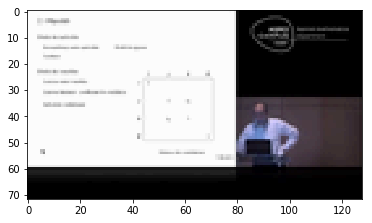

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :3)


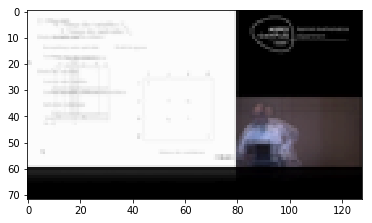

------------------------------ 
Slide n°  28
Première image :
https://youtu.be/uV5hmpzmWsU?t=1173s


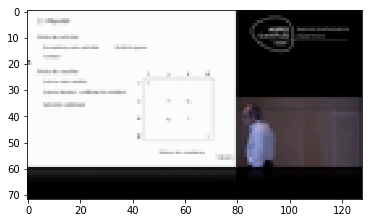

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :4)


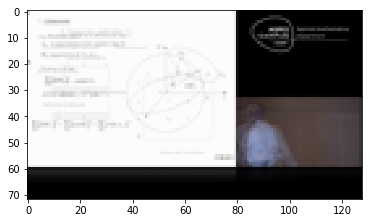

------------------------------ 
Slide n°  29
Première image :
https://youtu.be/uV5hmpzmWsU?t=1905s


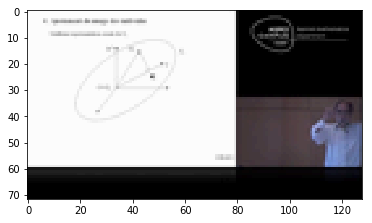

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :4)


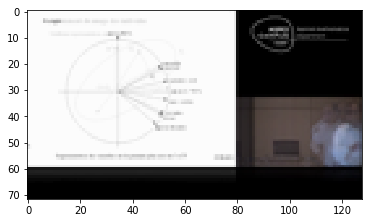

------------------------------ 
Slide n°  30
Première image :
https://youtu.be/uV5hmpzmWsU?t=3606s


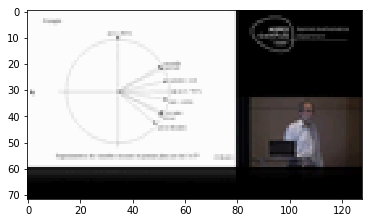

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :60)


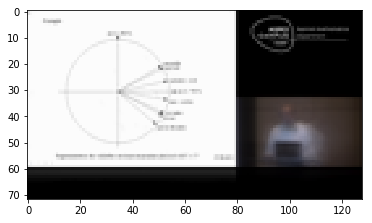

------------------------------ 
Slide n°  31
Première image :
https://youtu.be/uV5hmpzmWsU?t=3639s


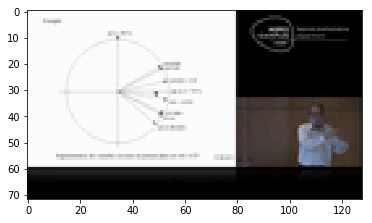

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :14)


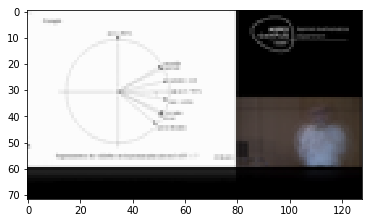

------------------------------ 
Slide n°  32
Première image :
https://youtu.be/uV5hmpzmWsU?t=3609s


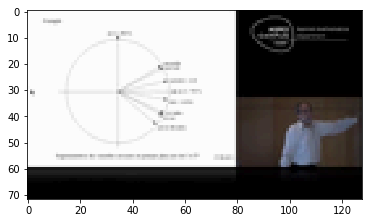

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :96)


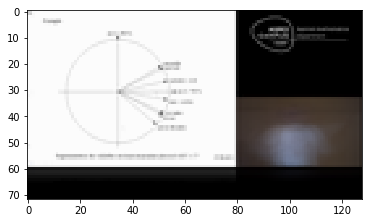

------------------------------ 
Slide n°  33
Première image :
https://youtu.be/uV5hmpzmWsU?t=399s


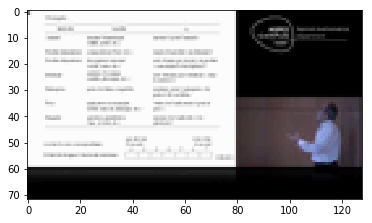

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :11)


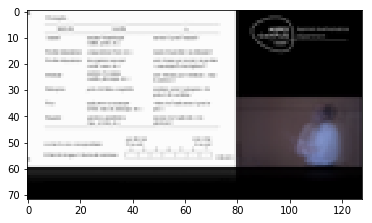

------------------------------ 
Slide n°  34
Première image :
https://youtu.be/uV5hmpzmWsU?t=393s


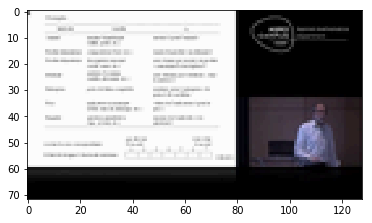

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :93)


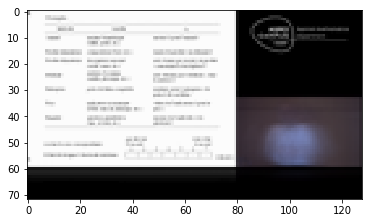

------------------------------ 
Slide n°  35
Première image :
https://youtu.be/uV5hmpzmWsU?t=2796s


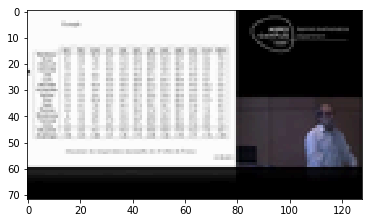

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :55)


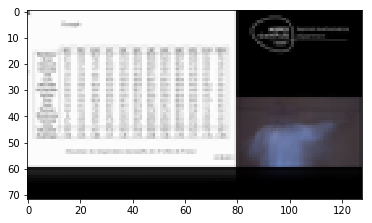

------------------------------ 
Slide n°  36
Première image :
https://youtu.be/uV5hmpzmWsU?t=2793s


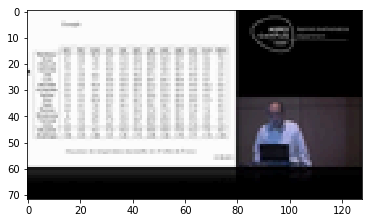

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :16)


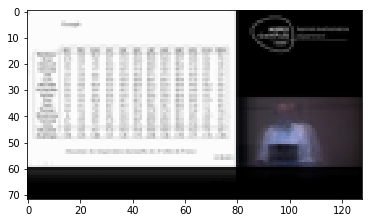

------------------------------ 
Slide n°  37
Première image :
https://youtu.be/uV5hmpzmWsU?t=4086s


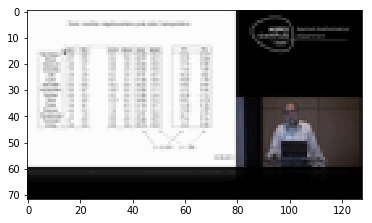

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :17)


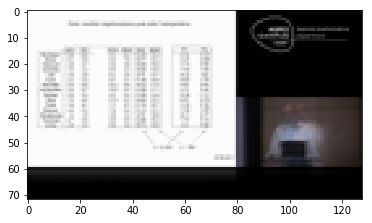

------------------------------ 
Slide n°  38
Première image :
https://youtu.be/uV5hmpzmWsU?t=3912s


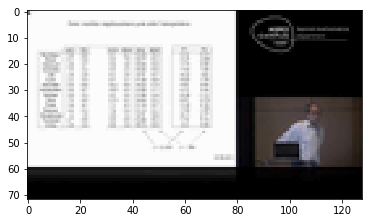

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :82)


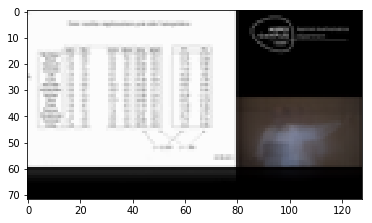

------------------------------ 
Slide n°  39
Première image :
https://youtu.be/uV5hmpzmWsU?t=0s


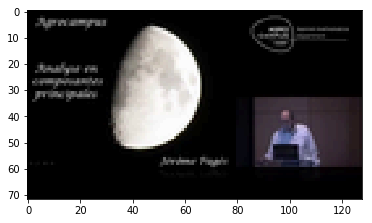

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :10)


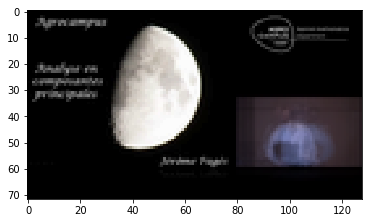

------------------------------ 
Slide n°  40
Première image :
https://youtu.be/uV5hmpzmWsU?t=5793s


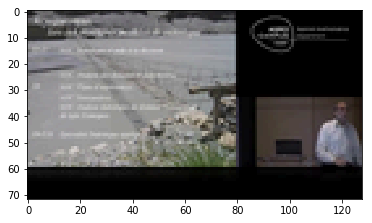

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :3)


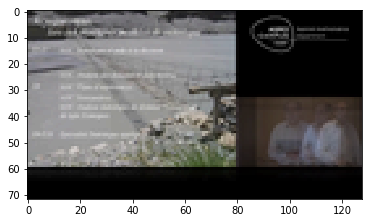

In [17]:
for g in range(max(final_clusters)):

    g = g + 1

    print('-'*30,"\nSlide n° ", g)

    km_centers = np.where(final_clusters == g)[0] # renvoie les indexes des centres issus du kmeans qui ont été groupés dans le groupe g après la classification hiérarchique

    img_ind = np.where([c in km_centers for c in clusters_kmeans]) # renvoie les indexes des images similaires, groupées par kmeans puis par classification hiérarchique

    same_slide = video.iloc[img_ind] # renvoie toutes les images montrant une même slide

    first_image = same_slide.sort_values("position").iloc[0]

    

    print("Première image :")

    display_image(video, first_image["position"])

    

    print("Image moyenne de tout le cluster")

    print("(Nombre d'images dans le cluster :{})".format(len(same_slide)))


    average_image = same_slide.iloc[:,1:].mean()   

    display_with_pylab(np.array(average_image))